In [473]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report)
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [474]:
#1 explore
# Loading the data (change this if you want other var-names, etc.)


exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [475]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

In [476]:
exoplanet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  9564 non-null   int64  
 1   KOIName                                                9564 non-null   object 
 2   KeplerName                                             2673 non-null   object 
 3   ExoplanetArchiveDisposition                            9564 non-null   object 
 4   DispositionUsingKeplerData                             9564 non-null   object 
 5   DispositionScore                                       8054 non-null   float64
 6   NotTransit-LikeFalsePositiveFlag                       9564 non-null   int64  
 7   koi_fpflag_ss                                          9564 non-null   int64  
 8   CentroidOffsetFalsePositiveFlag                 

DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


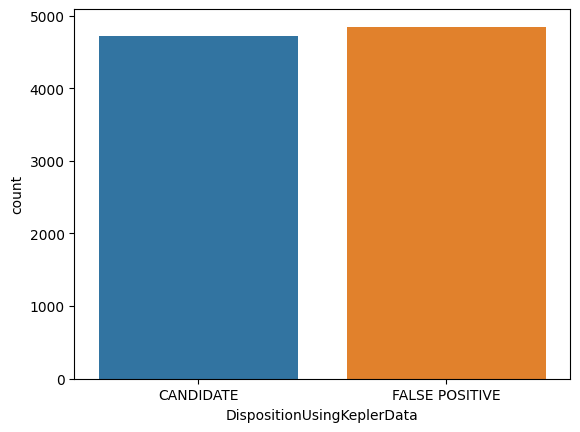

In [477]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


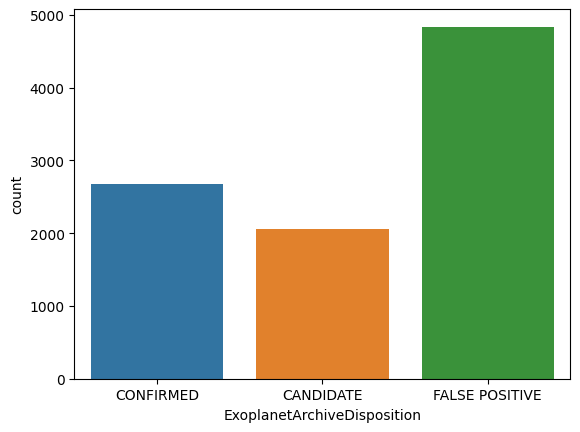

In [478]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline

- Explore missing values by finding the the precentage of missing values for each column - print as a dataframe

In [480]:
# Calculate the percentage of missing values for each column
missing_percentage = (exoplanet_df.isnull().sum() / len(exoplanet_df)) * 100

# Create a new DataFrame to display the results
missing_data = pd.DataFrame({'Column': exoplanet_df.columns, 'Missing Percentage': missing_percentage})

# Sort the DataFrame by the missing percentage in descending order
missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

# Reset the index of the DataFrame for a cleaner display
missing_data.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(missing_data)

                                               Column  Missing Percentage
0                   EquilibriumTemperatureLowerUnc, K          100.000000
1                   EquilibriumTemperatureUpperUnc, K          100.000000
2                                          KeplerName           72.051443
3                                    DispositionScore           15.788373
4              StellarEffectiveTemperatureLowerUnc, K            5.050188
5                   StellarRadiusLowerUnc, Solarradii            4.893350
6                   StellarRadiusUpperUnc, Solarradii            4.893350
7        StellarSurfaceGravityLowerUnc, log10(cm/s^2)            4.893350
8        StellarSurfaceGravityUpperUnc, log10(cm/s^2)            4.893350
9              StellarEffectiveTemperatureUpperUnc, K            4.893350
10                          TransitDepthLowerUnc, ppm            4.746968
11                            ImpactParameterLowerUnc            4.746968
12                          TransitDep

-  Visualise the missing values of the columns with the 5 most percentage of missing value

                                   Column  Missing Percentage
0       EquilibriumTemperatureLowerUnc, K          100.000000
1       EquilibriumTemperatureUpperUnc, K          100.000000
2                              KeplerName           72.051443
3                        DispositionScore           15.788373
4  StellarEffectiveTemperatureLowerUnc, K            5.050188


<Axes: >

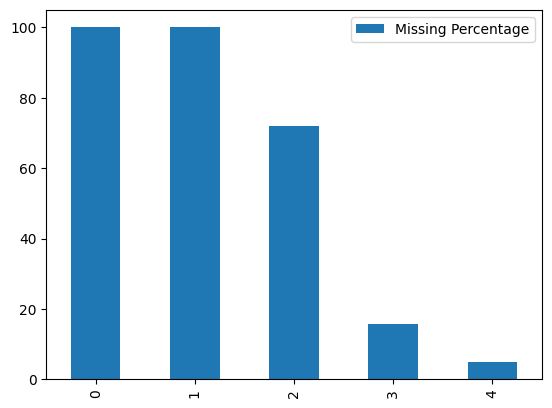

In [481]:
print(missing_data.head(5))
df_top_missing = missing_data.head(5)
df_top_missing.plot.bar()

- Identify potential outliers of the numeric features. This can be done in many ways but you should probably try to write some kind of script/loop that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]. Don't remove them just yet but discuss what could be a good approach.

In [482]:
numeric_features = exoplanet_df.select_dtypes(include=[np.number])

# Create an empty dictionary to store potential outliers count for each feature
outlier_counts = {}

# Define a function to identify outliers in a single feature
def identify_outliers(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature < lower_bound) | (feature > upper_bound)
    return outliers.sum()

# Iterate through each numeric feature and calculate potential outlier count
for column in numeric_features.columns:
    outlier_count = identify_outliers(exoplanet_df[column])
    outlier_counts[column] = outlier_count

# Print the count of potential outliers for each feature
for feature, count in outlier_counts.items():
    print(f"Feature: {feature}, Potential Outliers: {count}")

Feature: KepID, Potential Outliers: 0
Feature: DispositionScore, Potential Outliers: 0
Feature: NotTransit-LikeFalsePositiveFlag, Potential Outliers: 1531
Feature: koi_fpflag_ss, Potential Outliers: 2226
Feature: CentroidOffsetFalsePositiveFlag, Potential Outliers: 1889
Feature: EphemerisMatchIndicatesContaminationFalsePositiveFlag, Potential Outliers: 1148
Feature: OrbitalPeriod, days, Potential Outliers: 1567
Feature: OrbitalPeriodUpperUnc, days, Potential Outliers: 1650
Feature: OrbitalPeriodLowerUnc, days, Potential Outliers: 1650
Feature: TransitEpoch, BKJD, Potential Outliers: 1046
Feature: TransitEpochUpperUnc, BKJD, Potential Outliers: 838
Feature: TransitEpochLowerUnc, BKJD, Potential Outliers: 838
Feature: ImpactParamete, Potential Outliers: 82
Feature: ImpactParameterUpperUnc, Potential Outliers: 736
Feature: ImpactParameterLowerUnc, Potential Outliers: 120
Feature: TransitDuration, hrs, Potential Outliers: 869
Feature: TransitDurationUpperUnc, hrs, Potential Outliers: 930
F

- Thinking: It may contains some extreme data in outlier, so we decide to remove the outliers

- Determine what to do with potential outlier: keep, replace or remove

-  Based only on the analysis above, you should be able to remove some columns (two of the columns will have 100% missing values). Remove these columns.

In [483]:
columns_to_drop = ['EquilibriumTemperatureLowerUnc, K', 'EquilibriumTemperatureUpperUnc, K']
exoplanet_df.drop(columns_to_drop, axis=1, inplace=True)

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.) - there should be 4

In [484]:
columns_to_drop = ['KepID', 'KOIName', 'KeplerName', 'TCEDeliver']
exoplanet_df.drop(columns_to_drop, axis=1, inplace=True)

-  Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, you may choose to impute instead

In [485]:
exoplanet_df = exoplanet_df.dropna()

-  If you you chose to remove or replace outliers do this now. If you chose to keep, move on

In [486]:
numeric_features = exoplanet_df.select_dtypes(include=[np.number])

# Create an empty dictionary to store potential outliers count for each feature
outlier_counts = {}

# Define a function to identify outliers in a single feature
def identify_outliers(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (feature < lower_bound) | (feature > upper_bound)
    return outliers

# Create a mask to identify rows with outliers in any numeric feature
outlier_mask = np.any([identify_outliers(exoplanet_df[column]) for column in numeric_features.columns], axis=0)

# Remove rows with outliers from the DataFrame
exoplanet_df_cleaned = exoplanet_df[~outlier_mask]

# Now, 'exoplanet_df_cleaned' contains the DataFrame with outliers removed.

exoplanet_df = exoplanet_df_cleaned

-  Create a correlation matrix and discuss (use only numeric columns, perhaps make an extra dataset just with numeric values) - drop appropriate columns

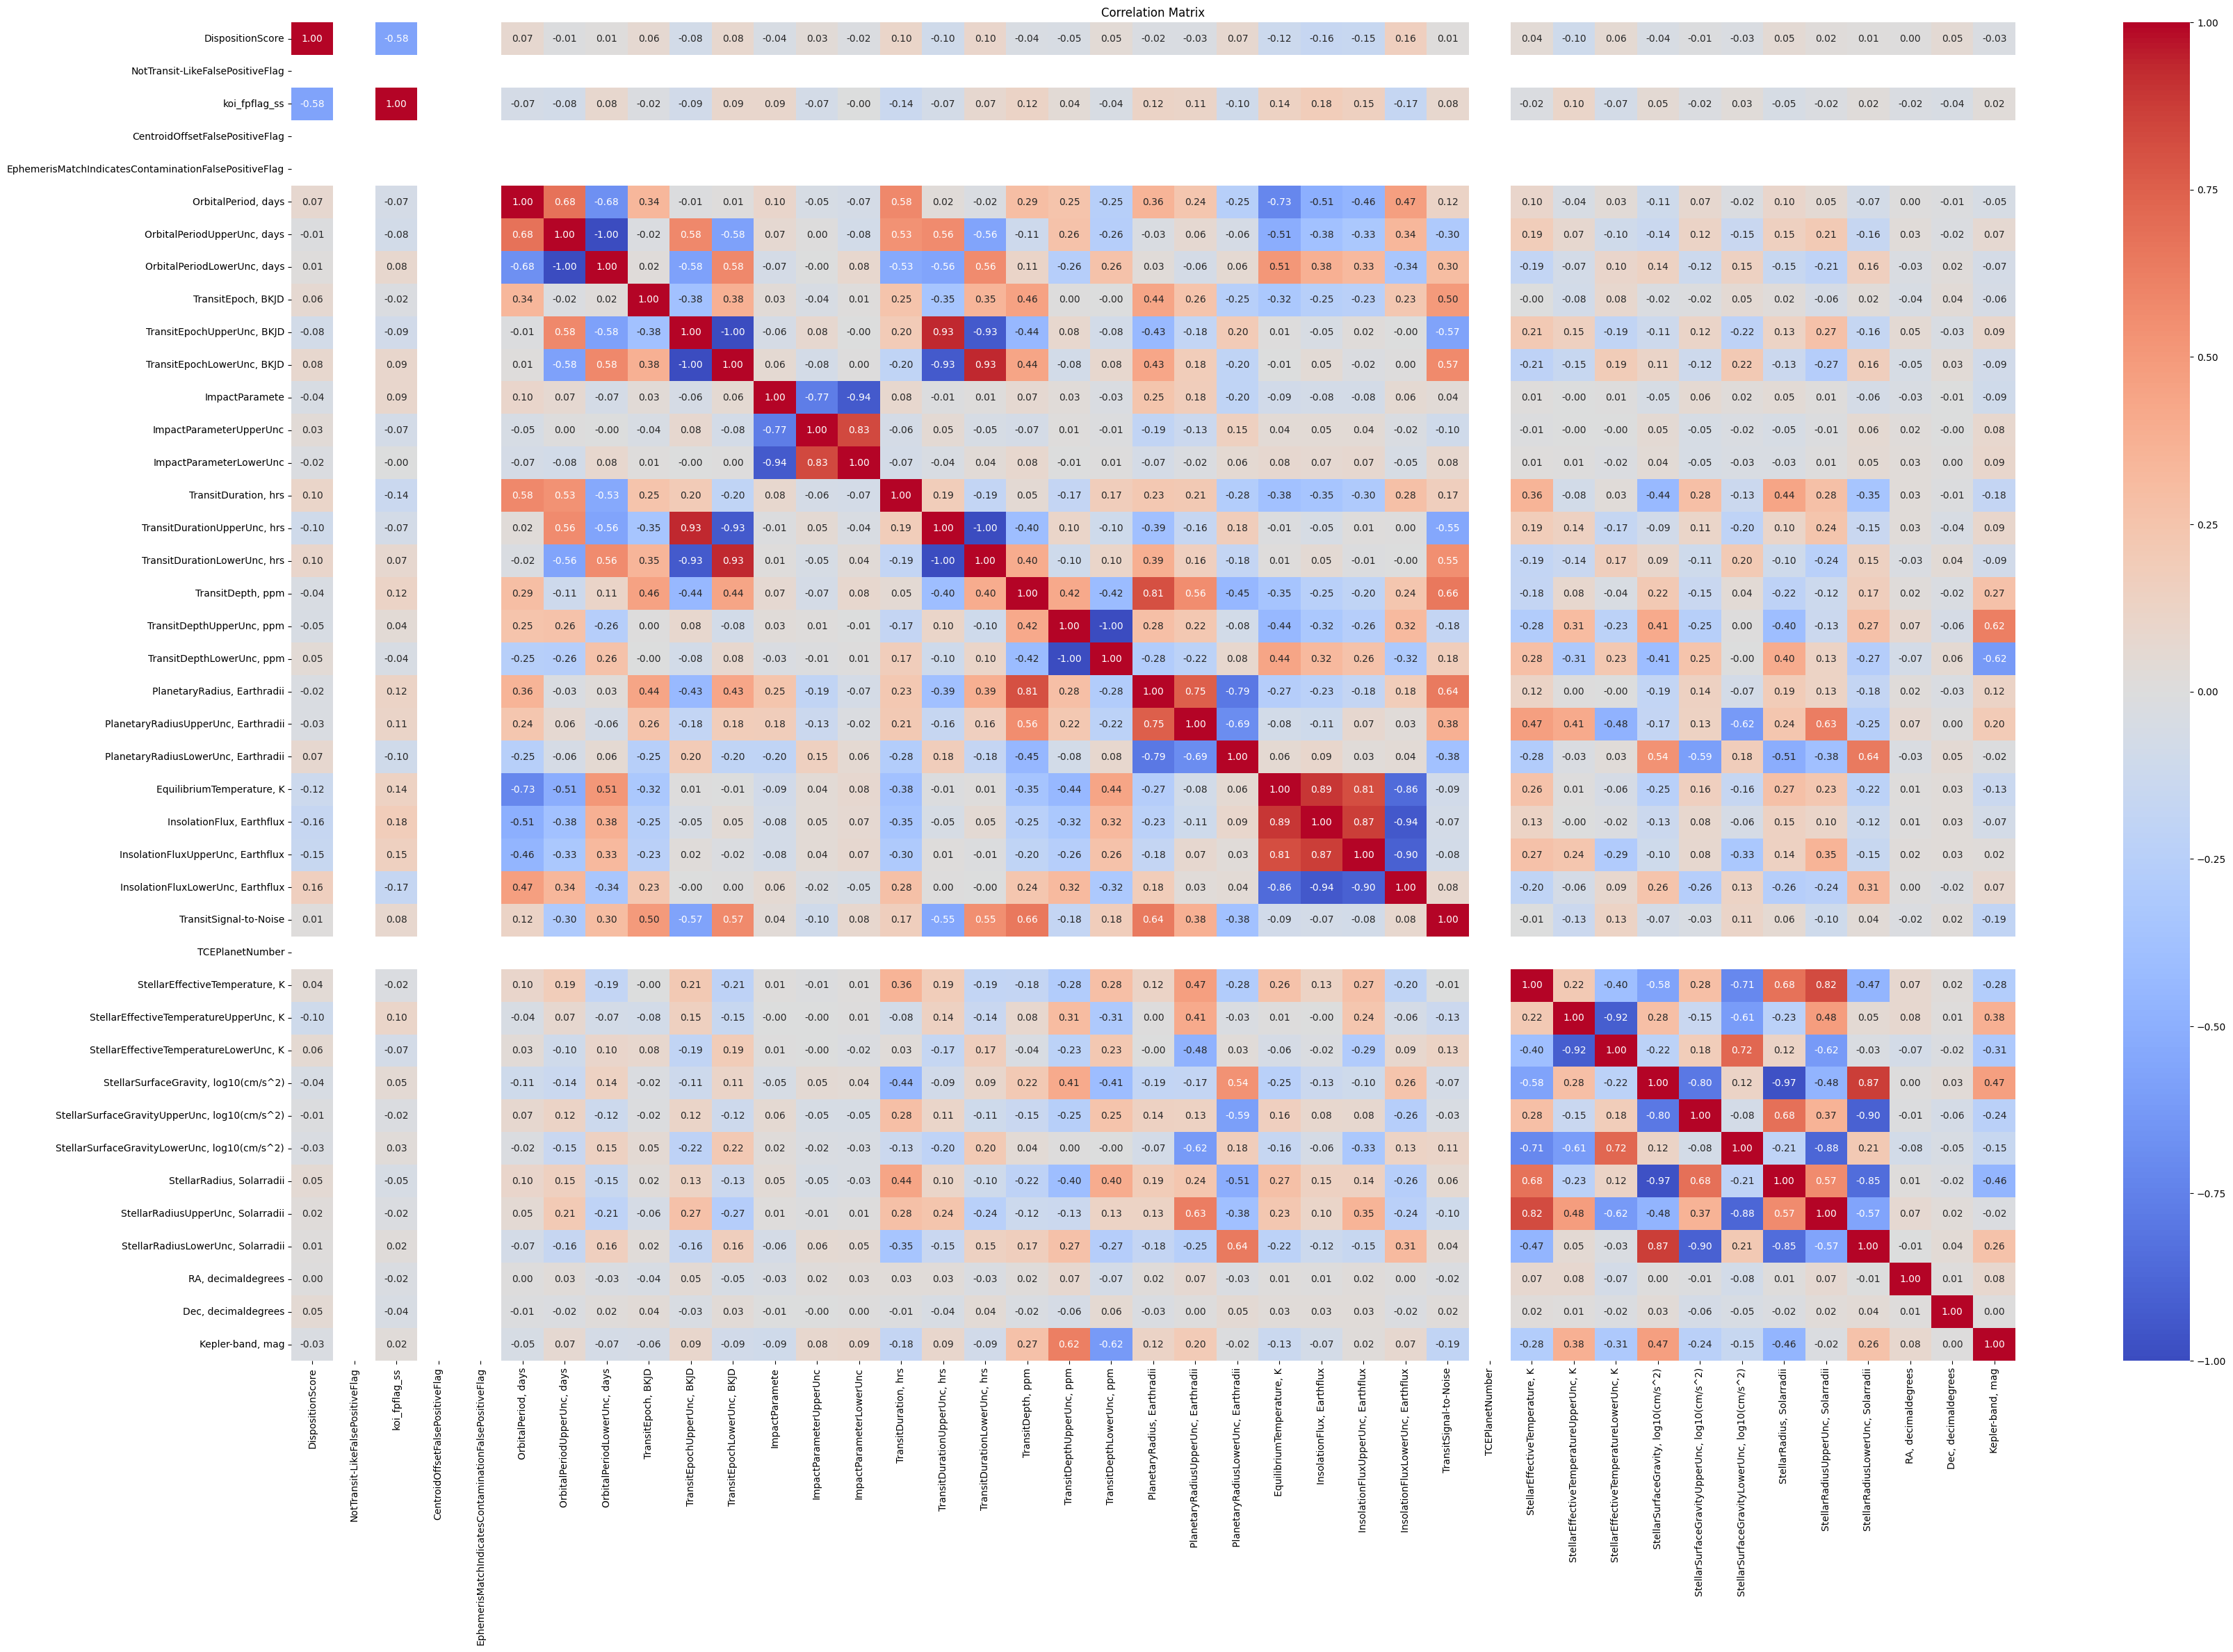

In [487]:

# Select only the numeric columns for correlation analysis
numeric_features = exoplanet_df.select_dtypes(include=[np.number])

# Create a correlation matrix
correlation_matrix = numeric_features.corr()

# Optional: Visualize the correlation matrix (heatmap)
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap visualization
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

# Specify the path where you want to save the image (replace 'heatmap.png' with your desired file name)
save_path = 'heatmap.png'

# Save the image to the local disk
plt.savefig(save_path)

# Show the heatmap (optional)
plt.show()

# Now, the heatmap visualization is saved as 'heatmap.png' in your current working directory.


In [488]:
columns_to_drop = ['OrbitalPeriodUpperUnc, days', 'OrbitalPeriodLowerUnc, days', 'TransitEpochUpperUnc, BKJD', 'TransitEpochLowerUnc, BKJD',
                   'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc', 'TransitDurationUpperUnc, hrs' ,'TransitDurationLowerUnc, hrs', 'TransitDepthUpperUnc, ppm', 'TransitDepthLowerUnc, ppm',
                   'InsolationFluxUpperUnc, Earthflux', 'InsolationFluxLowerUnc, Earthflux', 'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
       'StellarSurfaceGravityLowerUnc, log10(cm/s^2)', 'StellarEffectiveTemperatureUpperUnc, K',
       'StellarEffectiveTemperatureLowerUnc, K', 'StellarRadiusUpperUnc, Solarradii',
       'StellarRadiusLowerUnc, Solarradii']
exoplanet_df.drop(columns_to_drop, axis=1, inplace=True)

-  The values of `ExoplanetArchiveDisposition` and `ExoplanetArchiveDisposition` are categorical and if they are to act like labels, you should change them. Change them as follows: 'FALSE POSITIVE' values is assigned a numerical value of `0`, 'CANDIDATE' assigned `1`, and 'CONFIRMED' a `2`. Same assignment in both features. The easiest way is to create two new features, call them `KeplerDispositionStatus` and `ArchiveDispositionStatus`, and then drop the originalæ features. It will look something like this (the last couple of columns in the new dataframe)

In [489]:
exoplanet_df.head(30)

,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,"TransitDuration, hrs","TransitDepth, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarRadius, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag"
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,2.9575,615.8,2.26,0.26,-0.15,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,1.6545,603.3,2.75,0.88,-0.35,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509
5,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.201160,0.538,4.5945,1517.5,3.90,1.27,-0.42,835.0,114.81,66.5,1.0,6046.0,4.486,0.972,296.28613,48.224670,15.714
18,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.273582,173.258155,0.387,3.2875,1288.3,2.47,0.20,-0.24,649.0,41.85,87.2,1.0,4856.0,4.583,0.696,288.13824,47.724449,15.302
19,CONFIRMED,CANDIDATE,1.000,0,0,0,0,6.029303,171.602959,0.258,1.5821,1912.7,2.85,0.26,-0.15,678.0,50.04,65.4,1.0,4537.0,4.648,0.672,283.71088,47.863270,15.784
21,CONFIRMED,CANDIDATE,1.000,0,0,0,0,5.349554,171.806940,0.092,3.0278,831.0,2.55,0.16,-0.24,919.0,168.99,60.6,1.0,5185.0,4.440,0.910,292.37613,47.880989,15.416
25,CONFIRMED,CANDIDATE,1.000,0,0,0,0,21.676992,171.535940,0.896,3.4555,857.2,2.95,0.12,-0.23,530.0,18.64,34.3,1.0,4954.0,4.500,0.828,290.46512,47.929180,15.377
26,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.996780,171.742080,0.710,2.1717,934.7,2.78,0.52,-0.23,917.0,166.95,28.2,1.0,5339.0,4.552,0.847,297.80826,47.946671,15.861
27,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.280964,171.896590,0.424,2.8750,750.8,2.30,0.58,-0.19,1012.0,247.87,61.8,1.0,5644.0,4.564,0.831,294.26581,49.314091,15.356
31,CONFIRMED,CANDIDATE,1.000,0,0,0,0,38.377549,172.820480,0.468,5.5880,724.2,2.82,0.37,-0.34,529.0,18.53,34.7,1.0,5481.0,4.369,1.036,291.72202,49.480869,15.172


In [490]:

# Create a mapping dictionary for the categorical values to numerical values
mapping = {'FALSE POSITIVE': 0, 'CANDIDATE': 1, 'CONFIRMED': 2}

# Create new columns with numerical values based on the mapping
exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].map(mapping)
exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].map(mapping)

# Drop the original categorical columns
exoplanet_df.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'], axis=1, inplace=True)

# Now, your DataFrame 'exoplanet_df' will have the new columns with numerical values.


In [491]:
exoplanet_df.head(5)

,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,"OrbitalPeriod, days","TransitEpoch, BKJD",ImpactParamete,"TransitDuration, hrs","TransitDepth, ppm","PlanetaryRadius, Earthradii","PlanetaryRadiusUpperUnc, Earthradii","PlanetaryRadiusLowerUnc, Earthradii","EquilibriumTemperature, K","InsolationFlux, Earthflux",TransitSignal-to-Noise,TCEPlanetNumber,"StellarEffectiveTemperature, K","StellarSurfaceGravity, log10(cm/s^2)","StellarRadius, Solarradii","RA, decimaldegrees","Dec, decimaldegrees","Kepler-band, mag",KeplerDispositionStatus,ArchiveDispositionStatus
0,1.0,0,0,0,0,9.488036,170.538750,0.146,2.9575,615.8,2.26,0.26,-0.15,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347,2,1
4,1.0,0,0,0,0,2.525592,171.595550,0.701,1.6545,603.3,2.75,0.88,-0.35,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509,2,1
5,1.0,0,0,0,0,11.094321,171.201160,0.538,4.5945,1517.5,3.90,1.27,-0.42,835.0,114.81,66.5,1.0,6046.0,4.486,0.972,296.28613,48.224670,15.714,2,1
18,1.0,0,0,0,0,9.273582,173.258155,0.387,3.2875,1288.3,2.47,0.20,-0.24,649.0,41.85,87.2,1.0,4856.0,4.583,0.696,288.13824,47.724449,15.302,2,1
19,1.0,0,0,0,0,6.029303,171.602959,0.258,1.5821,1912.7,2.85,0.26,-0.15,678.0,50.04,65.4,1.0,4537.0,4.648,0.672,283.71088,47.863270,15.784,2,1


-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant

In [492]:
exoplanet_df['OrbitalPeriod, days'] = np.log1p(exoplanet_df['OrbitalPeriod, days'])
exoplanet_df['TransitEpoch, BKJD'] = np.log1p(exoplanet_df['TransitEpoch, BKJD'])
exoplanet_df['ImpactParamete'] = np.log1p(exoplanet_df['ImpactParamete'])
exoplanet_df['TransitDuration, hrs'] = np.log1p(exoplanet_df['TransitDuration, hrs'])
exoplanet_df['InsolationFlux, Earthflux'] = np.log1p(exoplanet_df['InsolationFlux, Earthflux'])
exoplanet_df['StellarEffectiveTemperature, K'] = np.log1p(exoplanet_df['StellarEffectiveTemperature, K'])
exoplanet_df['StellarSurfaceGravity, log10(cm/s^2)'] = np.log1p(exoplanet_df['StellarSurfaceGravity, log10(cm/s^2)'])
exoplanet_df['StellarRadius, Solarradii'] = np.log1p(exoplanet_df['StellarRadius, Solarradii'])

- Place `KeplerDispositionStatus` as the target and remove the following from the features: `DispositionScore`, `KeplerDispositionStatus`, `ArchiveDispositionStatus

In [493]:
feature_column = exoplanet_df.copy()
columns_to_drop = ['DispositionScore', 'KeplerDispositionStatus', 'ArchiveDispositionStatus']
feature_column.drop(columns_to_drop, axis=1, inplace=True)
target_column = 'KeplerDispositionStatus'

# Create the feature dataset and target labels
X = feature_column
y = exoplanet_df[target_column]

- Consider scaling your (numeric) data

In [494]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # You can choose another scaler if needed
X_scaled = scaler.fit_transform(X)  # Scale the numeric features


- You should now have two datasets, one with cleaned features and one with the target labels (1 for Candidate and 0 otherwise)

In [495]:
# X contains the cleaned and scaled (if applicable) feature dataset
# y contains the target labels (1 for Candidate and 0 otherwise)
# X_scaled can be used if you scaled your features

### 3+4. Train, Test, Validation, Cross Validation + Models
-  Consider which method to use to split the data and do the appropriate splits - if using CV still make a test set
-  Use claasification algorithms to train a model - which and how many is up to you

#### Test

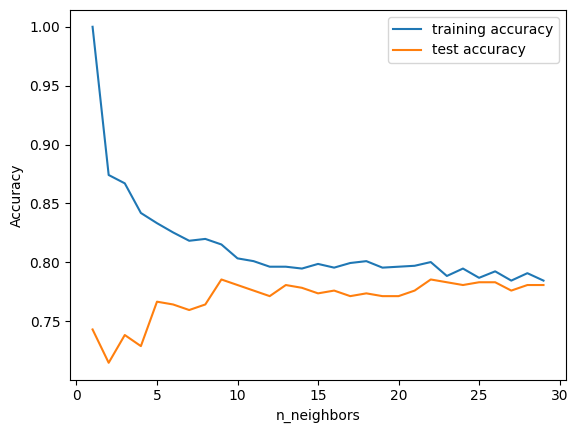

In [496]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Divide the data into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, random_state=45)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 8 to 50
neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

### Validation & Cross Validation

In [497]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=45)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))

Size of training set:953
Size of validation set:318
Size of test set:424


In [498]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Fix the parameter space
parameters = {'n_neighbors': range(1,30)}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
# Load the data and divide into train and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, random_state=45)
grid_search.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
best_score = 0
for num_neighbors in range(1,30):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainval, y_trainval, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainval, y_trainval)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainval, y_trainval)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 29
Best average score: 0.7796912150687045
Score on training/validation set: 0.7883556254917388
Score on test set: 0.7735849056603774


### 5. Evaluate
-  Write three functions:
     1. One that calculates accuracy, precision, recall, specificity, and f1-score
     2. One that outputs the confusion matrix
     3. One that diplays the precision-recall curve as well as the ROC-cruve
-  Use your newly written functions to evaluate your models using the test data created in (3+4)

In [499]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
X_trainval, X_test, y_trainval, y_test = train_test_split(X_scaled, y, random_state=45)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print("Accuracy: \n{}\n".format(clf.score(X_test,y_test)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1,average='micro')))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1,average='micro')))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1,average='micro')))

Accuracy: 
0.6721698113207547

Precision: 
0.6721698113207547

Recall: 
0.6721698113207547

F1: 
0.6721698113207547


- Confusion Matrix

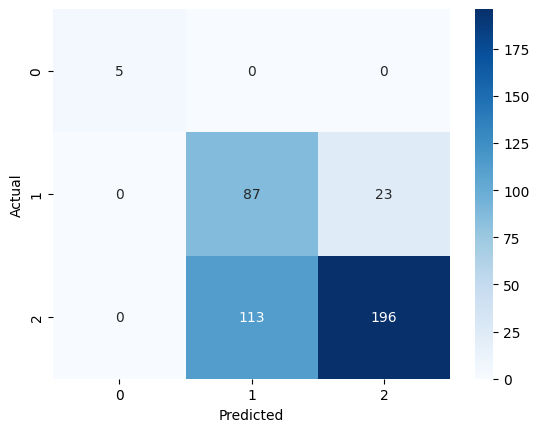

In [500]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_test,y_test)
predictions = clf.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- precision-recall curve as well as the ROC-cruve

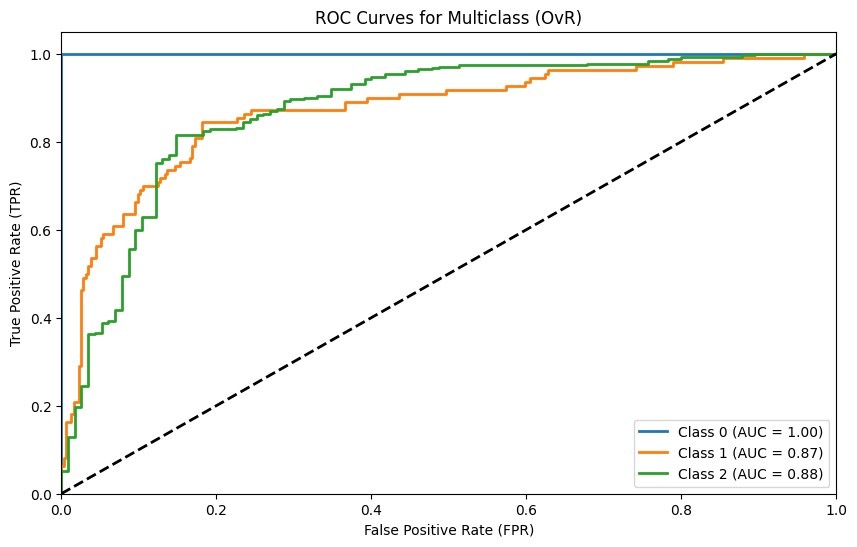

In [508]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create the OneVsRestClassifier model 
classifier = OneVsRestClassifier(LogisticRegression())  
classifier.fit(X_train, y_train)  # X_train: training features, y_train: multiclass labels

# Predict probabilities for each class (y_score) on the test data
y_score = classifier.predict_proba(X_test)

# Convert y_test to a NumPy array or pandas Series with a single index
y_test = y_test.reset_index(drop=True)

# Calculate ROC curve for each class
n_classes = len(classifier.classes_)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Multiclass (OvR)')
plt.legend(loc='lower right')
plt.show()
